In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from statsmodels.stats import inter_rater

In [2]:
## Raccolta dati da file

workers_answers = pd.read_csv("Crowd_Frame riscaricato/data/result/task1/Dataframe/workers_answers.csv")
workers_questionnaire = pd.read_csv("Crowd_Frame riscaricato/data/result/task1/Dataframe/workers_questionnaire.csv")
workers_dimensions_selection = pd.read_csv("Crowd_Frame riscaricato/data/result/task1/Dataframe/workers_dimensions_selection.csv")


/var/folders/4l/y4hbjt2s5tj88m9nnzs8x9qw0000gn/T/ipykernel_58640/1788121919.py:51: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


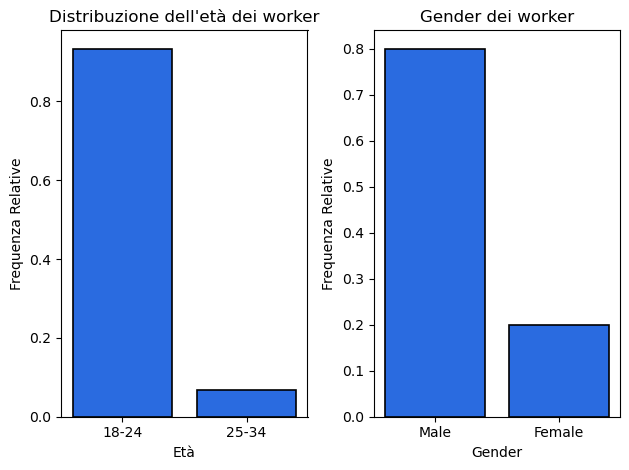

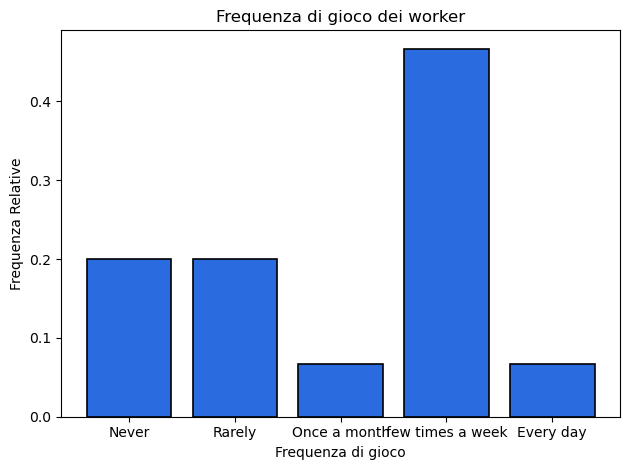

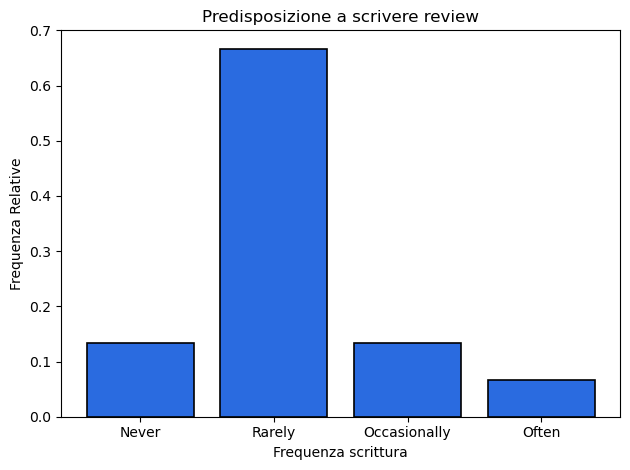

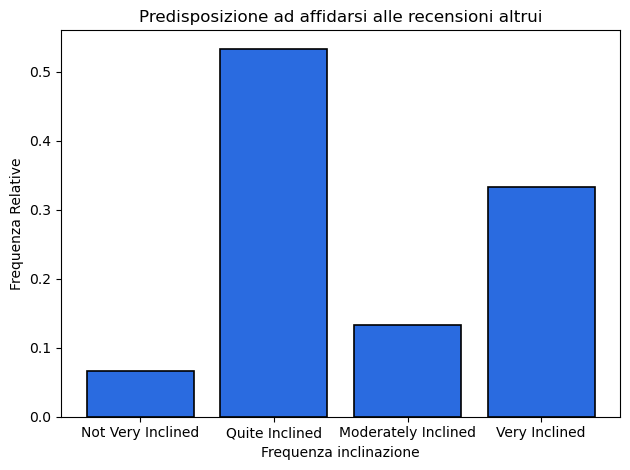

question_answer_text
Quite inclined (yes, they influence my purchase decision)    0.533333
Very inclined (yes, I decisively base my choices)            0.266667
Moderately inclined (yes, I consider them but not only)      0.133333
Not very inclined (no, I consider other factors)             0.066667
Name: count, dtype: float64


In [285]:
'''

4.b
Calcolate le frequenze relative delle risposte date dai lavoratori al questionario

'''

#Age

Age = workers_questionnaire[workers_questionnaire['question_attribute_name'] == "Age"]
absolute_frequencies_Age = Age['question_answer_text'].value_counts()
relative_frequencies_Age = absolute_frequencies_Age / len(Age)

# I dati relativi alle frequenze
categories = relative_frequencies_Age.index
frequencies = relative_frequencies_Age.values

# Creazione del barplot
plt.subplot(1, 2, 1)
plt.bar(categories, frequencies, color='#2A6BE0', edgecolor='black', linewidth=1.2)

# Aggiunta di etichette e titoli
plt.xlabel('Età')
plt.ylabel('Frequenza Relative')
plt.title('Distribuzione dell\'età dei worker')

plt.tight_layout()

# Visualizzazione del barplot

''''''''''''''''''''''''''''''''''''''''''''''''
#Gender

Gender = workers_questionnaire[workers_questionnaire['question_attribute_name'] == "Gender"]
absolute_frequencies_Gender = Gender['question_answer_text'].value_counts()
relative_frequencies_Gender = absolute_frequencies_Gender / len(Gender)

# I dati relativi alle frequenze
categories = absolute_frequencies_Gender.index
frequencies = relative_frequencies_Gender.values

# Creazione del barplot
plt.subplot(1, 2, 2)
plt.bar(categories, frequencies, color='#2A6BE0', edgecolor='black', linewidth=1.2)

# Aggiunta di etichette e titoli
plt.xlabel('Gender')
plt.ylabel('Frequenza Relative')
plt.title('Gender dei worker')

plt.tight_layout()
plt.savefig('plot/distribuzione_Eta_Gender.pdf')

# Visualizzazione del barplot
plt.show()

''''''''''''''''''''''''''''''''''''''''''''''''''
#Gaming_Frequency

Gaming_Frequency = workers_questionnaire[workers_questionnaire['question_attribute_name'] == "Gaming Frequency"]
absolute_frequencies_Gaming_Frequency = Gaming_Frequency['question_answer_text'].value_counts()
relative_frequencies_Gaming_Frequency = absolute_frequencies_Gaming_Frequency / len(Gaming_Frequency)

# I dati relativi alle frequenze

normalized_keys = ['Never', 'Rarely', 'Once a month', 'few times a week', 'Every day']

# Inizializza i valori corrispondenti
normalized_values = []

# Cerca corrispondenze parziali e somma i valori
for key in normalized_keys:
    matching_rows = relative_frequencies_Gaming_Frequency.index[relative_frequencies_Gaming_Frequency.index.str.contains(key, case=False)]
    normalized_values.append(relative_frequencies_Gaming_Frequency[matching_rows].sum())


# Creazione del barplot
plt.bar(normalized_keys, normalized_values, color='#2A6BE0', edgecolor='black', linewidth=1.2)

# Aggiunta di etichette e titoli
plt.xlabel('Frequenza di gioco')
plt.ylabel('Frequenza Relative')
plt.title('Frequenza di gioco dei worker')

plt.tight_layout()
plt.savefig('plot/distribuzione_Gaming_Frequency.pdf')

# Visualizzazione del barplot
plt.show()

''''''''''''''''''''''''''''''''''''''''''''''''''
#Write_Reviews

Write_Reviews = workers_questionnaire[workers_questionnaire['question_attribute_name'] == "Reliance on Reviews"]
absolute_frequencies_Write_Reviews = Write_Reviews['question_answer_text'].value_counts()
relative_frequencies_Write_Reviews = absolute_frequencies_Write_Reviews / len(Write_Reviews)

absolute_frequencies_Write_Reviews = Write_Reviews['question_answer_text'].value_counts()

# Definisci le chiavi normalizzate
normalized_keys = ['Never', 'Rarely', 'Occasionally', 'Often']

# Inizializza i valori corrispondenti
normalized_values = []

# Cerca corrispondenze parziali e somma i valori
for key in normalized_keys:
    matching_rows = relative_frequencies_Write_Reviews.index[relative_frequencies_Write_Reviews.index.str.contains(key, case=False)]
    normalized_values.append(relative_frequencies_Write_Reviews[matching_rows].sum())


# Creazione del barplot
plt.bar(normalized_keys, normalized_values, color='#2A6BE0', edgecolor='black', linewidth=1.2)

# Aggiunta di etichette e titoli
plt.xlabel('Frequenza scrittura')
plt.ylabel('Frequenza Relative')
plt.title('Predisposizione a scrivere review')


plt.tight_layout()
plt.savefig('plot/distribuzione_Write_Reviews.pdf')

# Visualizzazione del barplot
plt.show()

''''''''''''''''''''''''''''''''''''''''''''''''''
# Trust_Review

Trust_Reviews = workers_questionnaire[workers_questionnaire['question_attribute_name'] == "Trust in Reviews"]
absolute_frequencies_Trust_Reviews = Trust_Reviews['question_answer_text'].value_counts()
relative_frequencies_Trust_Reviews = absolute_frequencies_Trust_Reviews / len(Trust_Reviews)
# I dati relativi alle frequenze

normalized_keys = ['Not Very Inclined', 'Quite Inclined', 'Moderately Inclined', 'Very Inclined']

# Inizializza i valori corrispondenti
normalized_values = []

# Cerca corrispondenze parziali e somma i valori
for key in normalized_keys:
    matching_rows = relative_frequencies_Trust_Reviews.index[relative_frequencies_Trust_Reviews.index.str.contains(key, case=False)]
    normalized_values.append(relative_frequencies_Trust_Reviews[matching_rows].sum())


# Creazione del barplot
plt.bar(normalized_keys, normalized_values, color='#2A6BE0', edgecolor='black', linewidth=1.2)

# Aggiunta di etichette e titoli
plt.xlabel('Frequenza inclinazione')
plt.ylabel('Frequenza Relative')
plt.title('Predisposizione ad affidarsi alle recensioni altrui')

plt.tight_layout()
plt.savefig('plot/distribuzione_Trust_Review.pdf')

# Visualizzazione del barplot
plt.show()

print(relative_frequencies_Trust_Reviews)

In [284]:
'''

4.c
Scegliete una delle dimensioni categoriali e calcolate il percent agreement tra
worker per i valori forniti

'''


def crea_coppie_worker(vettore):
    # Funzione per creare tutte le possibili coppie di worker_id
    def tutte_le_coppie():
        coppie = []
        for i in range(len(vettore)):
            for j in range(i + 1, len(vettore)):
                coppia = (vettore[i], vettore[j])
                coppie.append(coppia)
        return coppie

    # Richiama la funzione per ottenere tutte le coppie
    tutte_le_coppie = tutte_le_coppie()
    # Filtra le coppie per escludere quelle con valori invertiti
    coppie_filtrate = [coppia for coppia in tutte_le_coppie if coppia[0] != coppia[1]]

    return coppie_filtrate


def confronto_vettore(vettore1, vettore2):
    # Verifica se la lunghezza dei vettori è la stessa
    if len(vettore1) != len(vettore2):
        raise ValueError("I vettori devono avere la stessa lunghezza")

    # Conta il numero di posizioni con valori uguali, escludendo le coppie con valore NaN
    num_valori_uguali = sum(
        (math.isclose(val1, val2) if not (math.isnan(val1) or math.isnan(val2) or val1 == math.nan or val2 == math.nan) else False)
        for val1, val2 in zip(vettore1, vettore2)
    )
    return num_valori_uguali


def estrai_copia_worker_id_da_tuple(tupla):
    if len(tupla) != 2:
        print("La tupla deve contenere esattamente due elementi.")
        return None

    worker_id_originale = tupla[0]
    worker_id_copia = tupla[1]
    return worker_id_originale, worker_id_copia



def creazione_riga_document_id(w1_id, caratteristica):

    #restituisce valore dato dal worker su una specifica caratteristica, eliminadno i doppioni
    row_w1 = workers_answers.loc[workers_answers['worker_id'] == w1_id, ['document_id',caratteristica ]]

    # Elimina la prima riga duplicata
    riga_w1_finale = row_w1.drop_duplicates(subset='document_id')

    return riga_w1_finale


def crea_df_personalizzato(df, lista_document_id, caratteristica):
    nuova_riga = {colonna: math.nan for colonna in lista_document_id}

    for index, row in df.iterrows():
        document_id = row['document_id']

        if document_id in lista_document_id:
            nuova_riga[document_id] = row[caratteristica]

    nuovo_df = pd.DataFrame([nuova_riga])

    return nuovo_df

def calcolo_percentAgreement(array):
    # Dividi ogni numero nell'array per 10
    array_diviso = [numero / 10 for numero in array]

    # Calcola la media dei numeri divisi
    media = sum(array_diviso) / len(array_diviso)

    return media



#lista di worker unici
worker_ids_unici = workers_answers['worker_id'].unique()
document_id_unici = workers_answers['document_id'].unique()

lista = crea_coppie_worker(worker_ids_unici)

ListaDiAppoggio = []

for tupla in lista:
    worker_1, worker_2 = estrai_copia_worker_id_da_tuple(tupla)
    documenutiValutatiW1 = creazione_riga_document_id(worker_1, 'Completeness_index')
    documenutiValutatiW2 = creazione_riga_document_id(worker_2, 'Completeness_index')
    df_finaleW1 = crea_df_personalizzato(documenutiValutatiW1,document_id_unici, 'Completeness_index' )
    df_finaleW2 = crea_df_personalizzato(documenutiValutatiW2,document_id_unici, 'Completeness_index')
    #display(df_finaleW1,df_finaleW2 )
    prima_riga_arrayW1 = df_finaleW1.iloc[0].to_numpy()
    prima_riga_arrayW2 = df_finaleW2.iloc[0].to_numpy()

    #nuemro di valori uguali fra i due worker, il controllo viene fatto tramite la vunzione confronto_vettore
    num_valori_uguali = confronto_vettore(prima_riga_arrayW1,prima_riga_arrayW2)
    ListaDiAppoggio.append(num_valori_uguali)
#listaNuemri -> array che contiene, il nuemro di valori di Completeness_index assegnato ad ogni document_id uguale, tra tuple di worker che hanno risposto uguale
percentAgreement = round(calcolo_percentAgreement(ListaDiAppoggio), 5)
print("Il valore di Percent Agreement, su valori di Completeness_index è", percentAgreement)



Il valore di Percent Agreement, su valori di Completeness_index è 0.0381


In [5]:
#PULIZIA worker_answers: il document_id in molti casi in worker_answers si ripeteva più di 5 volte, forse perchè il worker andava avanti e indietro nel task
#pertanto si seleziona quello cpn il time submit più recente

def puliziaCodice(workers_answers):

    # Itera su ciascun worker_id, preso una volta sola

    for worker_id in workers_answers['worker_id'].unique():
        # Filtra le righe relative al worker_id corrente
        worker_df = workers_answers[workers_answers['worker_id'] == worker_id]
        # Trova i document_id duplicati con il time_submit_parsed più basso
        duplicate_rows = worker_df[worker_df.duplicated(subset=['document_id'], keep='last')]
        # Ottiene gli indici delle righe da eliminare
        rows_to_drop = duplicate_rows.index
        # Elimina le righe non necessarie
        workers_answers = workers_answers.drop(rows_to_drop)


    return workers_answers


In [6]:
'''

4.d
Calcolate la confidence media espressa dai worker nel valutare ciascuna
recensione

'''
#estrazione dati
workers_answers['time_submit_parsed'] = pd.to_datetime(workers_answers['time_submit_parsed'])
#prima di fare qualsiasi analisi, pulisco i dati
workers_answers = puliziaCodice(workers_answers)

# vado a selezionare solo le colonne che voglio
selected_columns = ['worker_id','document_id', 'Confidence_value']

# Crea un nuovo dataframe includendo solo le colonne selezionate
workers_answers_confidance = workers_answers[selected_columns].copy()

#media valutazione data per ogni documento, ( slider )
media_valutazioni_D = workers_answers_confidance.groupby('document_id')['Confidence_value'].mean().reset_index()
display(media_valutazioni_D)
media_valutazioni_DM = media_valutazioni_D['Confidence_value'].mean()

print("La media delle valutazioni data per ogni documento è :", media_valutazioni_DM)
#display(media_valutazioni_D)

C:\Users\Thomas\AppData\Local\Temp\ipykernel_7516\1615143456.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  workers_answers['time_submit_parsed'] = pd.to_datetime(workers_answers['time_submit_parsed'])


,document_id,Confidence_value
0,B00004SVUZ,92.8
1,B00006JN5L,49.6
2,B0001DHQPI,78.2
3,B0002KMHD6,68.6
4,B000O39U3Q,77.8
5,B001DYVHY0,73.0
6,B0029MAXR2,72.4
7,B003TO59D2,71.2
8,B0041RUM0Q,86.4
9,B0050SYWGU,86.8


La media delle valutazioni data per ogni documento è : 76.32


In [7]:
'''

4.e
Calcolate il tempo medio impiegato dai worker per valutare ciascuna recensione

'''

# Seleziona le colonne 'worker_id', 'document_id', 'time_start' e 'time_end' dal DataFrame workers_answers
time_media = workers_answers[['worker_id', 'document_id', 'time_start', 'time_end']]
time_media = time_media.copy()


# Calcola la differenza tra le colonne 'time_end' e 'time_start', rappresentando la durata del tempo impiegato
time_media['time_spedn'] = time_media['time_end'] - time_media['time_start']
time_media = time_media.drop(['time_start', 'time_end'], axis=1)

#Calcoliamo il tempo medio per worker
tempo_medio_W = time_media.groupby('worker_id')['time_spedn'].mean().reset_index()
tempo_medio_WM = round(tempo_medio_W['time_spedn'].mean(), 4)

#display(tempo_medio_W)

print("La media del tempo impiegato dai worker per valutare ciascuna recensione :", tempo_medio_WM)






La media del tempo impiegato dai worker per valutare ciascuna recensione : 238.3873


In [8]:
#CALCOLO TEMPO MEDIO PER DOMADNA DI VERIFICA SU MARIO BROS
# Seleziona le colonne 'worker_id', 'document_id', 'time_start' e 'time_end' dal DataFrame workers_answers
time_media = workers_answers[['worker_id', 'document_id' , 'time_start', 'time_end']]
time_media = time_media.copy()

# Calcola la differenza tra le colonne 'time_end' e 'time_start', rappresentando la durata del tempo impiegato
time_media['time_spedn'] = time_media['time_end'] - time_media['time_start']
time_media = time_media.drop(['time_start', 'time_end'], axis=1)

#Calcoliamo il tempo medio per worker
tempo_medio_W = time_media.groupby('document_id')['time_spedn'].mean().reset_index()
tempo_medio_WM = tempo_medio_W['time_spedn'].mean()
tempo_medio_specifico_worker = tempo_medio_W[tempo_medio_W['document_id'] == 'B005ZNWT4C']

# Estrai il tempo medio per il worker specifico
tempo_medio_specifico = tempo_medio_specifico_worker['time_spedn'].mean()

# Visualizza il risultato
print(f"Tempo medio per il document_id == B005ZNWT4C: {tempo_medio_specifico:.2f} secondi")


Tempo medio per il document_id == B005ZNWT4C: 917.12 secondi


,document_id,time_spedn
0,B00004SVUZ,207.062
1,B00006JN5L,74.638
2,B0001DHQPI,396.858
3,B0002KMHD6,254.228
4,B000O39U3Q,134.906
5,B001DYVHY0,139.556
6,B0029MAXR2,225.012
7,B003TO59D2,226.472
8,B0041RUM0Q,227.638
9,B0050SYWGU,143.640


,document_id,Confidence_value
0,B00004SVUZ,92.8
1,B00006JN5L,49.6
2,B0001DHQPI,78.2
3,B0002KMHD6,68.6
4,B000O39U3Q,77.8
5,B001DYVHY0,73.0
6,B0029MAXR2,72.4
7,B003TO59D2,71.2
8,B0041RUM0Q,86.4
9,B0050SYWGU,86.8


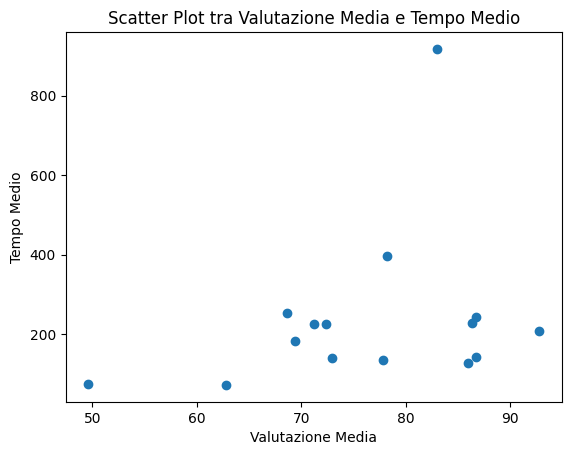

,document_id,valutazione_media,tempo_medio
0,B00004SVUZ,92.8,207.062
1,B00006JN5L,49.6,74.638
2,B0001DHQPI,78.2,396.858
3,B0002KMHD6,68.6,254.228
4,B000O39U3Q,77.8,134.906
5,B001DYVHY0,73.0,139.556
6,B0029MAXR2,72.4,225.012
7,B003TO59D2,71.2,226.472
8,B0041RUM0Q,86.4,227.638
9,B0050SYWGU,86.8,143.640


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

tempo_medio_D = time_media.groupby('document_id')['time_spedn'].mean().reset_index()
display(tempo_medio_D)
media_valutazioni_D = workers_answers_confidance.groupby('document_id')['Confidence_value'].mean().reset_index()
display(media_valutazioni_D)

#unisco i due dataframe per avere valutazione medi e tempo medio per ogni docuemnto
merged_dataset = pd.merge(media_valutazioni_D, tempo_medio_D, on='document_id')

merged_dataset = merged_dataset.rename(columns={'Confidence_value': 'valutazione_media',
                                                'time_spedn': 'tempo_medio'})
# Crea il grafico
plt.scatter(merged_dataset['valutazione_media'], merged_dataset['tempo_medio'])
plt.xlabel('Valutazione Media')
plt.ylabel('Tempo Medio')
plt.title('Scatter Plot tra Valutazione Media e Tempo Medio')
plt.show()
'''
Un'analisi può esser che non si notano correlazioni con tempo e valutazione, nel senso che una valutazione alta non equivale a un tempo medio elevato di rispota,
anche se poteva esser cosi perche per avere una valutazione alta, la recensione deve essere molto prolissa e ben sturitturata, quindi ci vuoleva mooto tempo ma non  e coi.
'''
display(merged_dataset)

In [10]:
'''

Analisi ulteriori
Pairwise agreement
'''

#CREAZIONE MATRICE CATEGORIA-TASK
#seleziona le colonne volute, nel nostro caso abbiamo scelto la categoria Completeness
selected_columns = ["document_id", "Completeness_value"]
df_selected = workers_answers[selected_columns]

#df_selected.columns.name = None

# creazione matrice categoria / task: la funzione pivot_table conta gli elementi uguali
pivot_table = pd.pivot_table(df_selected, index='document_id', columns='Completeness_value', aggfunc='size', fill_value=0)


import math
import statistics
from scipy.stats import hmean

numero_worker = len(pivot_table)
numero_task = 15

#coppie possibili: 2/m(m-1) 
coppie_possibili = 2/(numero_worker*(numero_worker-1))

pairwise_agreement_list = []

#somma coppie worker-worker sono in accordo: somma dei coefficenti binomiali
for row in pivot_table.itertuples():
    valori_documento = list(row[1:])
    somma_coefficienti = 0
    
    for i in valori_documento:
        coefficiente_binomiale = math.comb(i, 2)
        somma_coefficienti += coefficiente_binomiale
    
    pairwise_agreement_list.append(somma_coefficienti)
    

#valore del pairwise agreement per ogni colonna
pairwise_agreement_list = [i * coppie_possibili for i in pairwise_agreement_list]

#Pariwise agreement (P) = media dei valori di pairwise_agreement di ogni colonna
pairwise_agreement = statistics.mean(pairwise_agreement_list)


pairwise_agreement_atteso = []

#calcolo di k di fleiss: somma dei valori per ogni colonna (categoria)
for column in pivot_table.columns:
    somma_valori_colonna = pivot_table[column].sum()
    pairwise_agreement_atteso.append(somma_valori_colonna)

#dividere ogni somma per numero_task*numero_worker
pairwise_agreement_atteso = [i / (numero_task*numero_worker) for i in pairwise_agreement_atteso]

#Pairwise agreement atteso (Pe) = somma dei quadrati delle proporzioni di assegnamenti
pairwise_agreement_atteso = sum([pow(i, 2) for i in pairwise_agreement_atteso])

#calcolo della k di Fleiss: P-Pe / 1-Pe
k = (pairwise_agreement - pairwise_agreement_atteso) / (1 - pairwise_agreement_atteso)

print('pairwise_agreement=', pairwise_agreement)
print('k=',k)

pairwise_agreement= 0.028571428571428574
k= 0.005730228689267952
